In [265]:
# BUN, Chol 넣고 psqi 세부 항목 지우고 진행

In [266]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [267]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [268]:
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX',
            'BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','HDL_1','BUN_1','Chol_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','HDL_2','BUN_2','Chol_2']]

In [269]:
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,77.0,13.1,NaN
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,59.0,19.2,NaN
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,40.0,17.1,NaN
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,54.0,12.2,NaN
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,72.0,16.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 정제

In [270]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,77.0,13.1,NaN
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,59.0,19.2,NaN
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,40.0,17.1,NaN
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,54.0,12.2,NaN
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,72.0,16.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [272]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [273]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [274]:
psqi_df["CRP_1"] = psqi_df["CRP_1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["CRP_2"] = psqi_df["CRP_2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [275]:
psqi_df.describe()

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000
mean,38.366667,0.305556,23.799644,5.105556,7.700000,0.748889,5.844867,56.086111,34.113333,98.90000,...,19.053333,28.888333,0.862444,114.605556,72.477778,75.644444,81.328889,59.20000,12.984444,190.922222
std,11.589776,0.461927,4.936177,2.893833,4.105985,1.344157,1.412280,8.502880,7.708889,14.43773,...,6.616151,7.098802,0.071696,13.213544,9.091991,10.306814,10.251265,14.01372,3.508550,32.017358
min,20.000000,0.000000,15.231576,0.000000,0.100000,0.000000,2.820000,34.500000,15.100000,63.00000,...,7.700000,11.500000,0.700000,91.000000,57.000000,54.000000,61.000000,29.00000,6.000000,109.000000
25%,29.000000,0.000000,20.833309,3.000000,5.000000,0.200000,4.857500,50.525000,28.975000,92.00000,...,14.200000,24.275000,0.820000,104.000000,67.000000,68.000000,73.875000,49.00000,10.675000,167.750000
50%,35.500000,0.000000,23.422889,5.000000,6.500000,0.300000,5.720000,55.950000,34.000000,95.50000,...,17.950000,28.450000,0.850000,114.000000,71.000000,75.000000,80.500000,57.00000,12.700000,188.000000
75%,46.000000,1.000000,25.502662,7.000000,9.505000,0.700000,6.580000,62.000000,39.000000,102.00000,...,22.125000,33.450000,0.900000,123.000000,77.250000,82.000000,89.000000,69.00000,14.600000,211.000000
max,63.000000,1.000000,67.500000,14.000000,24.700000,11.100000,10.550000,78.400000,55.400000,182.00000,...,46.100000,48.300000,1.070000,158.000000,107.000000,112.000000,118.000000,116.00000,36.400000,296.000000


In [276]:
psqi_df["SEX"].value_counts()

0.0    125
1.0     55
Name: SEX, dtype: int64

In [277]:
psqi_df

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,35,1.0,24.097789,5.0,5.57,0.0,5.82,54.6,35.0,89,...,20.4,26.8,1.00,131.0,74.0,66.0,88.5,53.0,17.5,180.0
1,46,1.0,23.472213,5.0,7.35,0.7,5.46,44.3,43.7,90,...,14.5,18.6,0.84,126.0,87.0,108.0,85.0,64.0,14.4,203.0
2,32,1.0,23.744827,2.0,9.26,0.4,3.99,51.0,37.8,96,...,17.8,25.6,0.89,131.0,77.0,87.0,81.0,49.0,14.1,196.0
3,33,0.0,20.616175,4.0,3.52,0.0,5.84,39.1,42.1,81,...,12.8,21.9,0.78,102.0,62.0,70.0,69.0,98.0,10.5,224.0
4,28,0.0,18.437500,3.0,2.86,0.0,4.22,49.3,39.3,63,...,12.3,25.6,0.80,106.0,72.0,69.0,61.0,71.0,11.3,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,63,0.0,26.259585,3.0,4.20,0.2,4.78,42.3,47.3,96,...,27.3,39.3,0.94,134.0,89.0,81.0,98.0,66.0,17.1,141.0
176,57,1.0,28.630719,4.0,8.80,3.0,4.60,51.7,34.6,94,...,22.1,25.7,0.95,113.0,76.0,66.0,97.5,51.0,14.6,134.0
177,35,0.0,21.641274,1.0,6.30,0.4,6.34,55.9,34.9,87,...,17.5,29.9,0.84,107.0,72.0,64.0,80.5,49.0,9.7,147.0
178,61,0.0,20.421366,8.0,4.80,0.2,4.88,40.9,48.0,93,...,15.3,29.0,0.81,106.0,76.0,92.0,79.0,60.0,10.2,134.0


# 데이터 분포 확인

In [278]:
data_value_1=psqi_df[['HDL_1']]
data_value_2=psqi_df[['HDL_2']]
data_value_1.columns = ['HDL']
data_value_2.columns = ['HDL']
data_value=pd.concat([data_value_1, data_value_2],axis=0)
data_value

,HDL
0,57.0
1,68.0
2,46.0
3,96.0
4,62.0
...,...
175,66.0
176,51.0
177,49.0
178,60.0


In [279]:
data_value.describe()

,HDL
count,360.000000
mean,59.950000
std,14.287839
min,28.000000
25%,50.000000
50%,58.000000
75%,69.000000
max,116.000000


# data 분포도 확인

In [280]:
data=data_value.values
HDL_label=[[0] for _ in range(10)]
for i in data:
    value=float(i)
    if 20 <= i <= 29:
        HDL_label[0].append(i)
    elif 30 <= i <= 39:
        HDL_label[1].append(i)
    elif 40 <= i <= 49:
        HDL_label[2].append(i)
    elif 50 <= i <= 59:
        HDL_label[3].append(i)
    elif 60 <= i <= 69:
        HDL_label[4].append(i)
    elif 70 <= i <= 79:
        HDL_label[5].append(i)
    elif 80 <= i <= 89:
        HDL_label[6].append(i)
    elif 90 <= i <= 99:
        HDL_label[7].append(i)
    elif 100 <= i <= 109:
        HDL_label[8].append(i)
    elif 110 <= i <= 119:
        HDL_label[9].append(i)
num1=20
num2=29
for i in range(len(HDL_label)):
    HDL_label[i].pop(0)
    print(f"HDL {num1}-{num2}:",len(HDL_label[i]))
    num1+=10
    num2+=10

HDL 20-29: 2
HDL 30-39: 12
HDL 40-49: 75
HDL 50-59: 109
HDL 60-69: 77
HDL 70-79: 53
HDL 80-89: 21
HDL 90-99: 8
HDL 100-109: 1
HDL 110-119: 2


In [281]:
result_list = []

# 피검사  안하고 넣을 수 있는 것

In [282]:
#x 배열 생성 (피검사안하고 얻을 수 있는 것)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1','WHR_1',
            'Muscle_1','Fat_1_x','FatPercentage _1','SBP_1','DBP_1','HR_1','Waist_1']].values
X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2','WHR_2',
            'Muscle_2','Fat_2_x','FatPercentage_2','SBP_2','DBP_2','HR_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [283]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [284]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [285]:
len(x_train), len(x_test)

(288, 72)

In [286]:
X.shape, Y.shape

((360, 12), (360, 1))

In [287]:
dim=X.shape[1]
dim

12

# MLP

In [288]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 0s - loss: 3445.2881 - mse: 3445.2881
Epoch 2/150
72/72 - 0s - loss: 2814.7090 - mse: 2814.7090
Epoch 3/150
72/72 - 0s - loss: 1865.6669 - mse: 1865.6669
Epoch 4/150
72/72 - 0s - loss: 939.9670 - mse: 939.9670
Epoch 5/150
72/72 - 0s - loss: 383.0261 - mse: 383.0261
Epoch 6/150
72/72 - 0s - loss: 251.5765 - mse: 251.5765
Epoch 7/150
72/72 - 0s - loss: 227.6738 - mse: 227.6738
Epoch 8/150
72/72 - 0s - loss: 213.4165 - mse: 213.4165
Epoch 9/150
72/72 - 0s - loss: 203.6831 - mse: 203.6831
Epoch 10/150
72/72 - 0s - loss: 195.0960 - mse: 195.0960
Epoch 11/150
72/72 - 0s - loss: 188.3390 - mse: 188.3390
Epoch 12/150
72/72 - 0s - loss: 181.1553 - mse: 181.1553
Epoch 13/150
72/72 - 0s - loss: 176.7669 - mse: 176.7669
Epoch 14/150
72/72 - 0s - loss: 173.0049 - mse: 173.0049
Epoch 15/150
72/72 - 0s - loss: 168.4250 - mse: 168.4250
Epoch 16/150
72/72 - 0s - loss: 166.2608 - mse: 166.2608
Epoch 17/150
72/72 - 0s - loss: 162.1033 - mse: 162.1033
Epoch 18/150
72/72 - 0s - loss: 16

[221.5851287841797, 221.5851287841797]

In [289]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

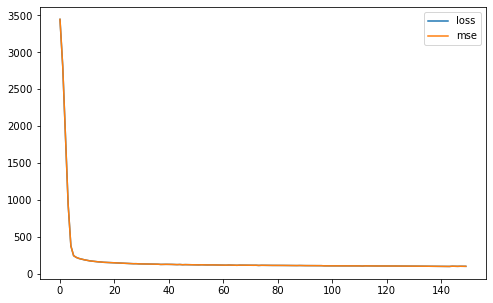

In [290]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [291]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [292]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [293]:
#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy_1=(scores/len(y_train))*100

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy_2=(scores/len(y_test))*100
result_list.append([12, accuracy_1, accuracy_2])

In [294]:
#오차 범위 10 설정
print('<오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도
print()

<오차범위 10>
- train set prediction accuracy(+-10): 70.14 %
- test set prediction accuracy(+-10): 65.28 %



# 혈액 검사 결과 제외 특징 중 중요한 특징 선별

In [295]:
#x 배열 생성 (피검사 안할 수 있는 것 중에 선별한 것)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1','Muscle_1','Fat_1_x','SBP_1','DBP_1','HR_1','Waist_1']].values
X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2','Muscle_2','Fat_2_x','SBP_2','DBP_2','HR_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [296]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [297]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [298]:
len(x_train), len(x_test)

(288, 72)

In [299]:
X.shape, Y.shape

((360, 10), (360, 1))

In [300]:
dim=X.shape[1]
dim

10

# MLP

In [301]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 0s - loss: 3464.9653 - mse: 3464.9653
Epoch 2/150
72/72 - 0s - loss: 2885.6084 - mse: 2885.6084
Epoch 3/150
72/72 - 0s - loss: 1984.2852 - mse: 1984.2852
Epoch 4/150
72/72 - 0s - loss: 991.8587 - mse: 991.8587
Epoch 5/150
72/72 - 0s - loss: 403.0878 - mse: 403.0878
Epoch 6/150
72/72 - 0s - loss: 284.8588 - mse: 284.8588
Epoch 7/150
72/72 - 0s - loss: 247.5618 - mse: 247.5618
Epoch 8/150
72/72 - 0s - loss: 223.3112 - mse: 223.3112
Epoch 9/150
72/72 - 0s - loss: 203.0857 - mse: 203.0857
Epoch 10/150
72/72 - 0s - loss: 189.9907 - mse: 189.9907
Epoch 11/150
72/72 - 0s - loss: 181.4632 - mse: 181.4632
Epoch 12/150
72/72 - 0s - loss: 173.0619 - mse: 173.0619
Epoch 13/150
72/72 - 0s - loss: 164.4738 - mse: 164.4738
Epoch 14/150
72/72 - 0s - loss: 163.8799 - mse: 163.8799
Epoch 15/150
72/72 - 0s - loss: 159.4356 - mse: 159.4356
Epoch 16/150
72/72 - 0s - loss: 155.2837 - mse: 155.2837
Epoch 17/150
72/72 - 0s - loss: 152.6922 - mse: 152.6922
Epoch 18/150
72/72 - 0s - loss: 14

[109.99166870117188, 109.99166870117188]

In [302]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

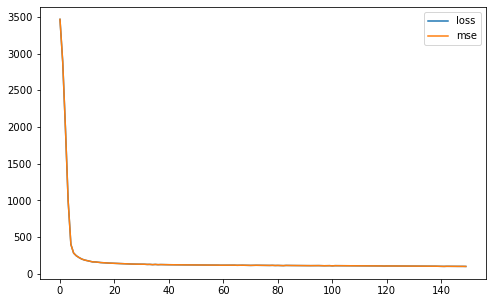

In [303]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [304]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [305]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [306]:
#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy_1=(scores/len(y_train))*100

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy_2=(scores/len(y_test))*100
result_list.append([10, accuracy_1, accuracy_2])

In [307]:
#오차 범위 10 설정
print('<오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도
print()

<오차범위 10>
- train set prediction accuracy(+-10): 72.22 %
- test set prediction accuracy(+-10): 70.83 %



# 8가지 특징 사용

# X, Y 배열 생성

In [308]:
#x 배열 생성 (피검사 안할 수 있는 것 중에 선별한 것)
X1=psqi_df[['SEX','AGE','BMI_1','Muscle_1','Fat_1_x','SBP_1','DBP_1','Waist_1']].values
X2=psqi_df[['SEX','AGE','BMI_2','Muscle_2','Fat_2_x','SBP_2','DBP_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [309]:
len(X), len(Y)

(360, 360)

In [310]:
X.shape, Y.shape

((360, 8), (360, 1))

# 정규화

In [311]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [312]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [313]:
len(x_train), len(x_test)

(288, 72)

In [314]:
X.shape, Y.shape

((360, 8), (360, 1))

In [315]:
dim=X.shape[1]
dim

8

# MLP

In [316]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 0s - loss: 3531.4600 - mse: 3531.4600
Epoch 2/150
72/72 - 0s - loss: 2993.4321 - mse: 2993.4321
Epoch 3/150
72/72 - 0s - loss: 2073.8701 - mse: 2073.8701
Epoch 4/150
72/72 - 0s - loss: 1022.8505 - mse: 1022.8505
Epoch 5/150
72/72 - 0s - loss: 440.8520 - mse: 440.8520
Epoch 6/150
72/72 - 0s - loss: 329.5905 - mse: 329.5905
Epoch 7/150
72/72 - 0s - loss: 280.6910 - mse: 280.6910
Epoch 8/150
72/72 - 0s - loss: 243.9059 - mse: 243.9059
Epoch 9/150
72/72 - 0s - loss: 218.1366 - mse: 218.1366
Epoch 10/150
72/72 - 0s - loss: 200.9890 - mse: 200.9890
Epoch 11/150
72/72 - 0s - loss: 187.5383 - mse: 187.5383
Epoch 12/150
72/72 - 0s - loss: 176.5115 - mse: 176.5115
Epoch 13/150
72/72 - 0s - loss: 169.5193 - mse: 169.5193
Epoch 14/150
72/72 - 0s - loss: 163.6751 - mse: 163.6751
Epoch 15/150
72/72 - 0s - loss: 159.1357 - mse: 159.1357
Epoch 16/150
72/72 - 0s - loss: 155.3073 - mse: 155.3073
Epoch 17/150
72/72 - 0s - loss: 151.5064 - mse: 151.5064
Epoch 18/150
72/72 - 0s - loss: 

[119.04595184326172, 119.04595184326172]

In [317]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

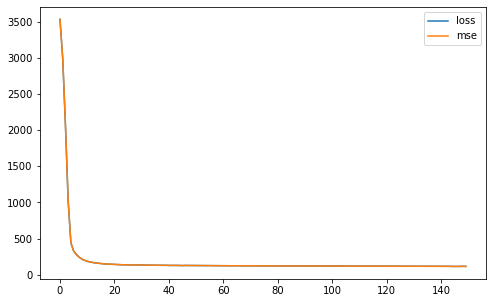

In [318]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [319]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [320]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [321]:
#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy_1=(scores/len(y_train))*100

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy_2=(scores/len(y_test))*100
result_list.append([8, accuracy_1, accuracy_2])

In [322]:
#오차 범위 10 설정
print('<오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도
print()

<오차범위 10>
- train set prediction accuracy(+-10): 70.14 %
- test set prediction accuracy(+-10): 63.89 %



# 임상적 기준 발생 위험 요인

In [323]:
#x 배열 생성 (임상적 기준 HDL 위험 요인)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1']].values
X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [324]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [325]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [326]:
len(x_train), len(x_test)

(288, 72)

In [327]:
X.shape, Y.shape

((360, 4), (360, 1))

In [328]:
dim=X.shape[1]
dim

4

# MLP

In [329]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 0s - loss: 3528.6016 - mse: 3528.6016
Epoch 2/150
72/72 - 0s - loss: 3119.8962 - mse: 3119.8962
Epoch 3/150
72/72 - 0s - loss: 2439.6978 - mse: 2439.6978
Epoch 4/150
72/72 - 0s - loss: 1526.5825 - mse: 1526.5825
Epoch 5/150
72/72 - 0s - loss: 674.9138 - mse: 674.9138
Epoch 6/150
72/72 - 0s - loss: 241.2494 - mse: 241.2494
Epoch 7/150
72/72 - 0s - loss: 185.1534 - mse: 185.1534
Epoch 8/150
72/72 - 0s - loss: 180.3941 - mse: 180.3941
Epoch 9/150
72/72 - 0s - loss: 174.6745 - mse: 174.6745
Epoch 10/150
72/72 - 0s - loss: 170.8385 - mse: 170.8385
Epoch 11/150
72/72 - 0s - loss: 167.3963 - mse: 167.3963
Epoch 12/150
72/72 - 0s - loss: 163.6557 - mse: 163.6557
Epoch 13/150
72/72 - 0s - loss: 160.4321 - mse: 160.4321
Epoch 14/150
72/72 - 0s - loss: 158.4318 - mse: 158.4318
Epoch 15/150
72/72 - 0s - loss: 155.4015 - mse: 155.4015
Epoch 16/150
72/72 - 0s - loss: 153.5448 - mse: 153.5448
Epoch 17/150
72/72 - 0s - loss: 151.4666 - mse: 151.4666
Epoch 18/150
72/72 - 0s - loss: 

[118.28389739990234, 118.28389739990234]

In [330]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

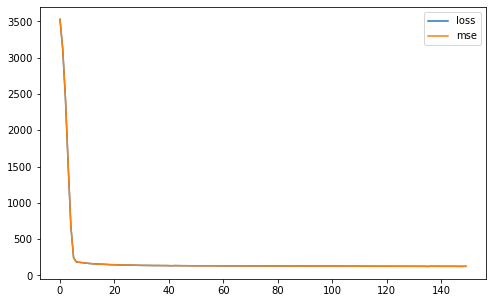

In [331]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [332]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [333]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [334]:
#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy_1=(scores/len(y_train))*100

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy_2=(scores/len(y_test))*100
result_list.append([4, accuracy_1, accuracy_2])

In [335]:
#오차 범위 10 설정
print('<오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도
print()

<오차범위 10>
- train set prediction accuracy(+-10): 69.10 %
- test set prediction accuracy(+-10): 69.44 %



In [336]:
for i in result_list:
    print(f'{i[0]}개의 특징 사용 train: {i[1]} |  test: {i[2]}')

12개의 특징 사용 train: 70.13888888888889 |  test: 65.27777777777779
10개의 특징 사용 train: 72.22222222222221 |  test: 70.83333333333334
8개의 특징 사용 train: 70.13888888888889 |  test: 63.888888888888886
4개의 특징 사용 train: 69.09722222222221 |  test: 69.44444444444444
